# Lion Loan Analysis

# Intorduction

Lion company saat ini seddang mengevaluasi data-data client yang melakukan pinjaman. Lion company ingin melakukan analisis terhadap kegagalan pembayaran peminjaman yang dilakukan client berdasarkan kumpulan data seperti income, amount loan, amount loan term, dependents, married, education dll. Analisis ini bertujuan untuk menemukan pola client yang gagal melakukan pembayaran pinjaman. Hal ini membantu company dalam memilih client yang akan melakukan pinjaman nantinya. Memberi pinjaman di client yang salah akan membawa kerugian bagi perusahaan. Namun, memberi pinjaman kepada client yang tetap akan membawa keuntungan bagi perusahaan.

# External Link

- Dashboard Link: https://lookerstudio.google.com/reporting/08137519-268d-4c5e-af69-1ac754956087/page/uiDTD/edit
- Presentation Deck Link: https://docs.google.com/presentation/d/1c1l28miJ7FsEphQoIU7pMdHgTa_UWf4-2t5ivwgvN9U/edit#slide=id.g226d7e19c58_0_93
- Elevator pitch: https://drive.google.com/file/d/1BCXP5Y1TBAsmBa5HH69WYoIr0hN2325z/view?usp=drive_link

# Working Area

---

## 1. Import Libraries

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import RobustScaler
# Preprocessing Encoding
from sklearn.preprocessing import OrdinalEncoder
#Fiture Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.impute import SimpleImputer

---

## 2. Load Data

In [222]:
# Load Data Frame
df = pd.read_csv('lion-loan-train.csv')

In [153]:
df_test =pd.read_csv('lion-loan-test.csv')

In [154]:
df_test.shape

(367, 12)

In [155]:
# Showing top 5 Data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [156]:
# The dimensionality of Daatabase
print('Dimensionality:', df.shape)

Dimensionality: (614, 13)


In [157]:
# Database Column Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Insight**
Dataset memiliki 8 data kategorikal dan 5 data numerikal. Berdasarkan informasi dataset, terdapat beberapa data yang memiliki missing values. Now, let's check the missing values.

Data credit history merupakan data kategorikal bukan data numerikal, sehingga perlu mengubah type data atau menguba label data.

*Missing Values*

Missing values adalah data kejadian umum dan jika tidak ditangani dalam kumpulan data pelatihan(data train), dapat mengurangi kinerja model fit atau dapat menyebabkan model menjadi bias[1].

Data yang hilang ini bisa disebabkan oleh beberapa hal, salah satu contohnya adalah

Error pada data entry, baik itu human error ataupun kesalahan pada sistem
Pada data survey, bisa disebabkan oleh responden yang lupa mengisi pertanyaan, pertanyaan yang sulit dimengerti, ataupun pertanyaan enggan diisi karena merupakan pertanyaan yang sensitif

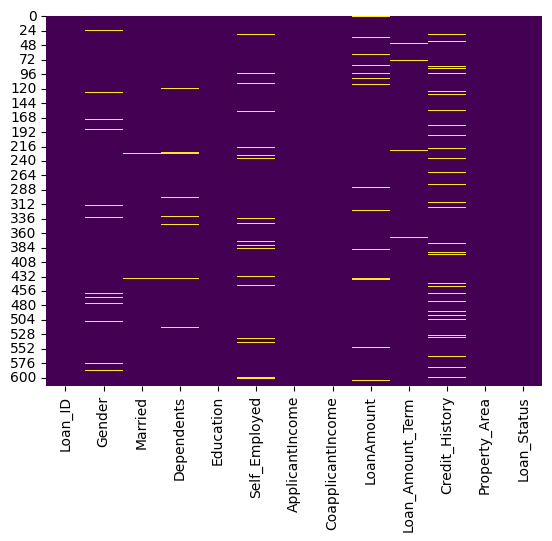

In [158]:
# Heatmap visualization for missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

# Show the plot
plt.show()

**Insight**
- Terdapat banyak missing values pada dataset. Langkah selanjutnya adalah menghitung presentase missing values.
- Sebagian data 'Dependents' yang hilang terlihat memiliki hubungan dengan data 'Married' yang hilang. Namun, sebagian data 'Dependents' tidak memiliki hubungan dengan data missing values lainnya. Missing Values Data 'Dependents' termasuk Missing at random (MAR), sdangkan data 'Married' termasuk Missing Not At Random (MNAR). 
- Berdasarkan visualisasi heatmap, terlihat bahwa data 'Gender' dan 'Self_Employed' tidak memiliki hubungan dengan data missing yang lainnya. Hal ini menunjukkan bahwa data yang hilang pada ketua data tersebut hilang secara acak atau Missing completely at random (MCAR). 
- Untuk mengetahui mengapa data numerical missing, maka perlu dilakukan analisis terhadap distribusi data.

Selanjutnya, menghapus feature drop column Loan_ID yang seluruh datanya merupakan data unique, sehingga diputuskan untuk dihapus.

In [159]:
df.drop('Loan_ID', axis=1, inplace=True)

---

## Exploratory Data Analysis

---

### **Categorical Data*

In [160]:
df.describe(exclude = np.number)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


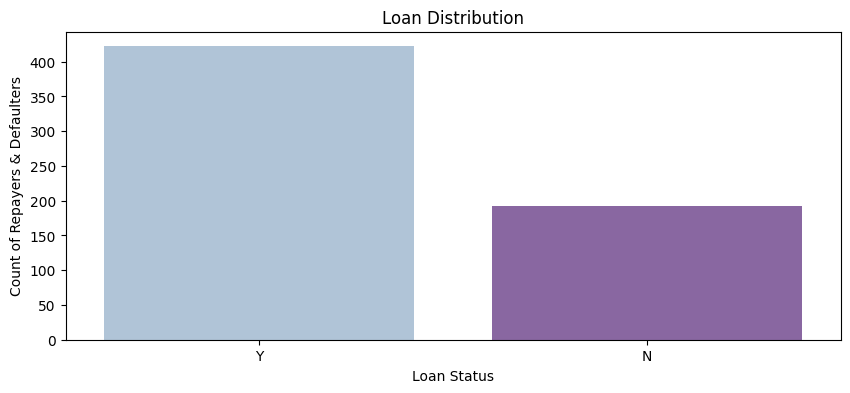

In [285]:
LoanStatus = df["Loan_Status"].value_counts().reset_index().rename(columns={'index':'Loan_Status', 'Loan_Status':'Count'})
plt.figure(figsize=(10,4))
x= ['Y','N']
sns.barplot(x="Loan_Status",y='Count', data = LoanStatus, palette= 'BuPu')
plt.xlabel("Loan Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Loan Distribution")
plt.show()

Visualisasi barplot menunjukkan data Loan client tidaklah *balanced*. Data didominasi oleh client yang berhasil melakukan peminjaman yang tidak kesulitan melakukan pembayaran pinjaman. Sekarang, mari lihat rasio perbandingan data client dengan status pinjaman 'Y' yang berarti repayer dan 'N' yang berarti Defaulter.

In [162]:
# Calculate the imbalance ratio
count_0 = LoanStatus.iloc[0]["Count"]
count_1 = LoanStatus.iloc[1]["Count"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Rasio ketidakseimbangan persentase terhadap data Repayer dan Defaulter: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Rasio ketidakseimbangan relatif terhadap data Pembayar dan Pelanggaran %.2f : 1 (approx)'%(count_0/count_1))

Rasio ketidakseimbangan persentase terhadap data Repayer dan Defaulter: 68.73 and 31.27
Rasio ketidakseimbangan relatif terhadap data Pembayar dan Pelanggaran 2.20 : 1 (approx)


**Insight:**
Perbandingan rasio antara data client yang berhasil meminjam dan gagal meminjam adalah 2.20 : 1. Ini artinya jumlah data client yang berhasil melakukan pinjaman 2.20 kali lipat lebih besar daripada client yang gagal melakukan pembayaran.

In [163]:
def categorical_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Percentage barplot for all categories
    plt.subplot(1, 2, 1)
    total_count = len(df)
    counts = df[variable].value_counts()
    percentages = counts / total_count * 100
    ax = sns.barplot(x=percentages.index, y=percentages.values)
    ax.set_xlabel(variable)
    ax.set_ylabel('Percentage')
    ax.set_title('Percentage Barplot of {}'.format(variable))

    # Percentage barplot for Loan Status 'N' in each category
    plt.subplot(1, 2, 2)
    n_counts = df.loc[df['Loan_Status'] == 'N', variable].value_counts()
    n_percentages = (n_counts / counts) * 100
    ax = sns.barplot(x=n_percentages.index, y=n_percentages.values, palette='BuPu')
    ax.set_xlabel(variable)
    ax.set_ylabel('Percentage of Loan Status = N')
    ax.set_title('Percentage Barplot of Loan Status = N by {}'.format(variable))

    plt.tight_layout()
    plt.show()


In [164]:
# Create analyze categorical relationship function
def analyze_categorical_relationship(df, variable, target_variable):
    contingency_table = pd.crosstab(df[variable], df[target_variable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    if p_value < 0.05:
        relationship = 'Significant'
    else:
        relationship = 'Not Significant'

    print("Variable:", variable)
    print("Chi-Square:", chi2)
    print("P-Value:", p_value)
    print("Relationship:", relationship)
    print()

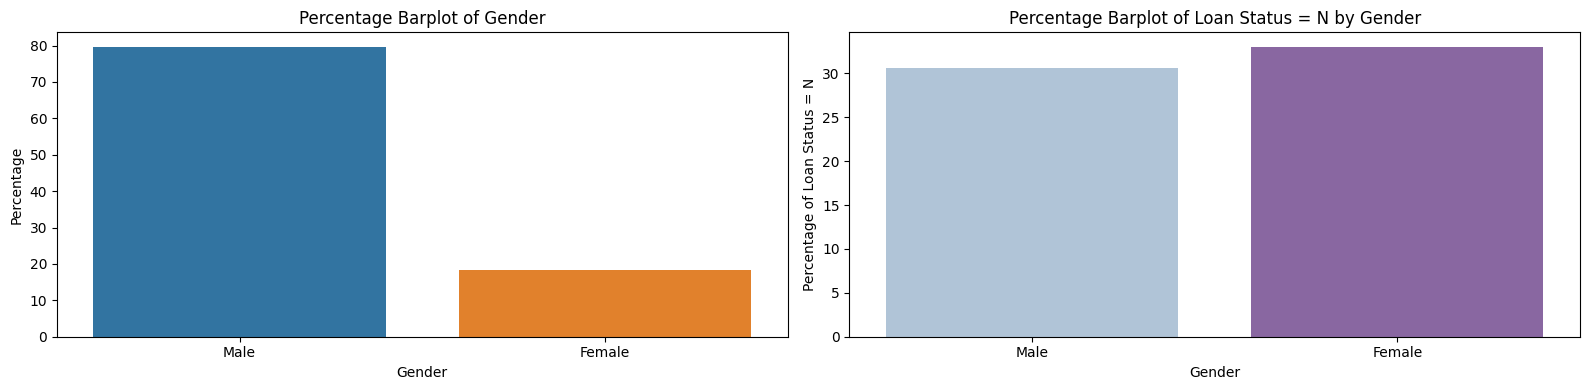

In [165]:
categorical_plots(df, 'Gender')

In [166]:
analyze_categorical_relationship(df, 'Gender', 'Loan_Status')

Variable: Gender
Chi-Square: 0.13962612116543877
P-Value: 0.7086529816451106
Relationship: Not Significant



**Insight**
- Data client didominasi oleh 'Male', presentase client male sebesesar 80% sedangkan wanita cuman 20%. Hal ini berarti jumlah client 'Male' 4 kali lebih banyak dari client 'Female'
- Presentase data 'Male' dan 'Female' yang gagal dalam melakukan pinjaman relatif sama, sehingga data gender diidentifikasi sebagai data yang tidak akan memberikan impact terhadap keberhasilan client melakukan peminjaman. 
- Data yang tidak significant ini didukung oleh P-value sebesar 0.7 yang nilainya lebih besar dari nilai signifikansi (0.05) yang menunjukkan hubungan yang tidak significant antara data gender dan Loan Status.

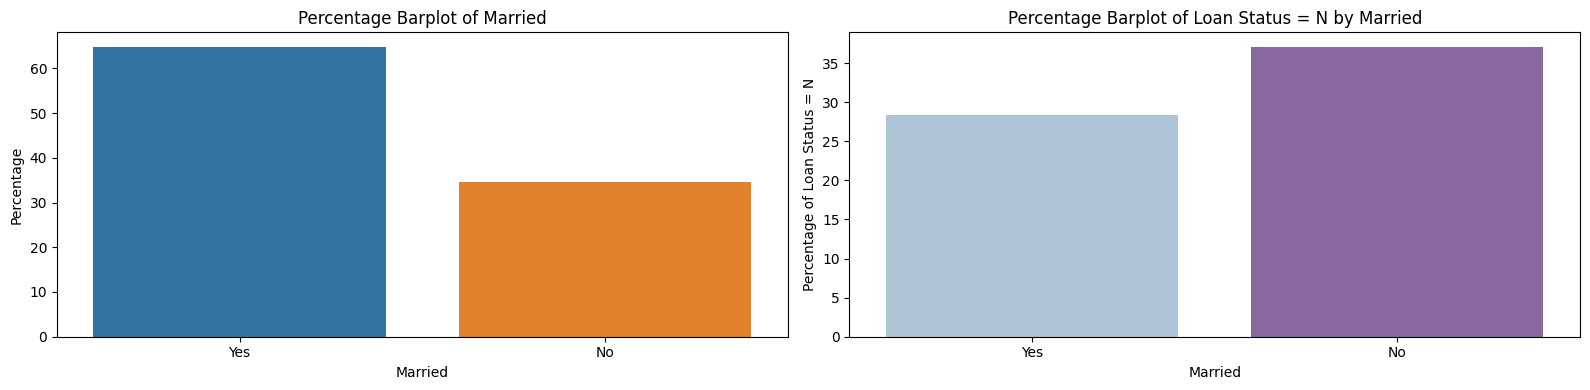

In [167]:
# Married
categorical_plots(df, 'Married')

In [168]:
analyze_categorical_relationship(df, 'Married', 'Loan_Status')

Variable: Married
Chi-Square: 4.475019348315097
P-Value: 0.03439381301579988
Relationship: Significant



**Insight**
- Mayoritas client adalah client yang telah menikah. 65% client telah menikah dan 35% lainnya belum menikah.
- Mayoritas data client yang telah menikah jauh lebih besar. Namun presentase data client yang belum menikah dan gagal melakukan pinjaman lebih dasar dari data client yang menikah dan gagal melakukan peminjaman. Dengan demikian mayoritas data client yang berhasil melakukan pinjaman didominasi oleh client yang telah menikah. 

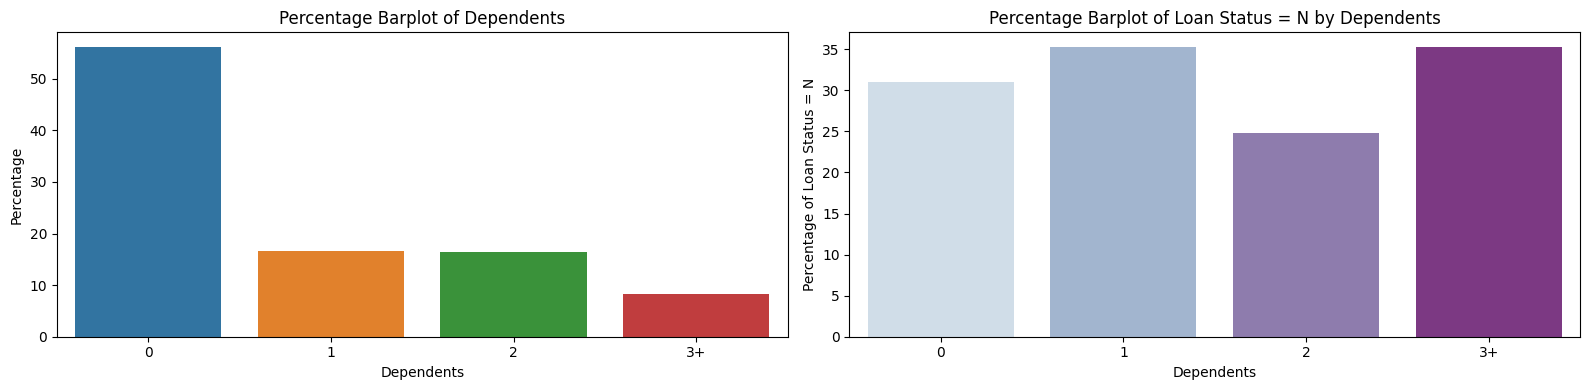

In [169]:
# Dependents
categorical_plots(df, 'Dependents')

In [170]:
analyze_categorical_relationship(df, 'Dependents', 'Loan_Status')

Variable: Dependents
Chi-Square: 3.158339770698263
P-Value: 0.3678506740863211
Relationship: Not Significant



**Insight**
- Data tanggungan atau data dependents didominasi oleh client yang tidak memiliki anak. Kemudian diikuti oleh client yang memiliki 1 dan 2 tanggungan. Data minoritas adalah client yang memiliki 3 atau lebih tanggungan.
- Barplot client yang gagal melakukan peminjaman tidak memberikan pola yang cukup jelas dalam hubungannya dengan data dependents, sehingga data dependents didentifikasi sebagai data yang tidak memberi signifikansi terhadap status loan client. Hal ini juga terlihat jelas pada p value yang melebihi batas nilasi signifikasi. 

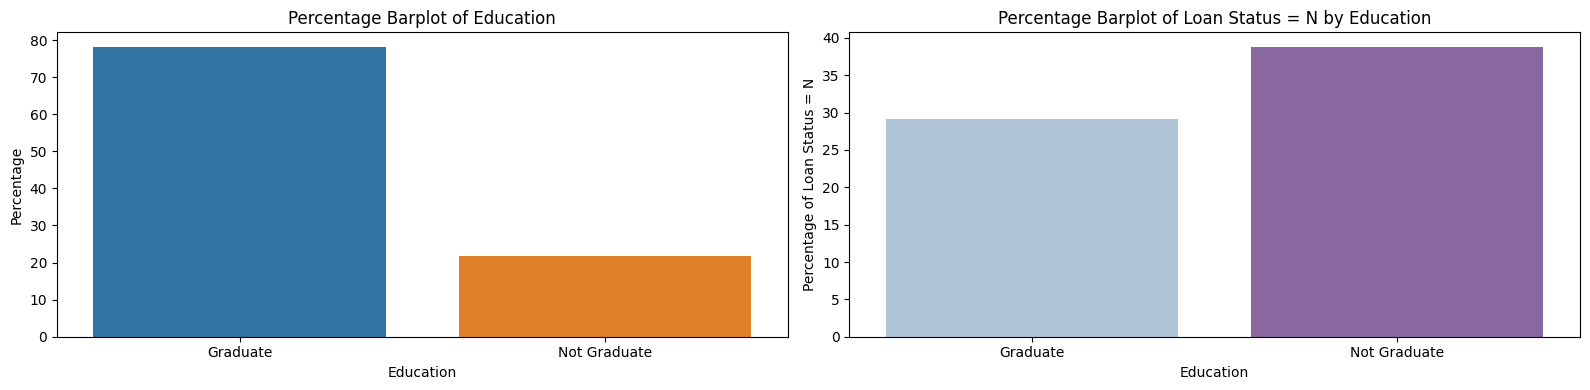

In [171]:
# Education
categorical_plots(df, 'Education')

In [172]:
analyze_categorical_relationship(df, 'Education', 'Loan_Status')

Variable: Education
Chi-Square: 4.091490413303621
P-Value: 0.043099621293573545
Relationship: Significant



**Insight**
- Data Education memiliki data yang tidak balanced. Data didominasi oleh data client yang 'Graduate'. 
- Namun, presentase data client yang 'Not Graduate' dan gagal dalam melakukan pinjaman lebih besar dibanding data client yang 'Graduate'. Hal ini menunjukkan data Education memiliki signifikansi terhadap loan status client. Jika Client 'Graduate' maka kemungkinan untuk melakukan pinjaman lebih bedar dibanding client yang 'Not graduate'.

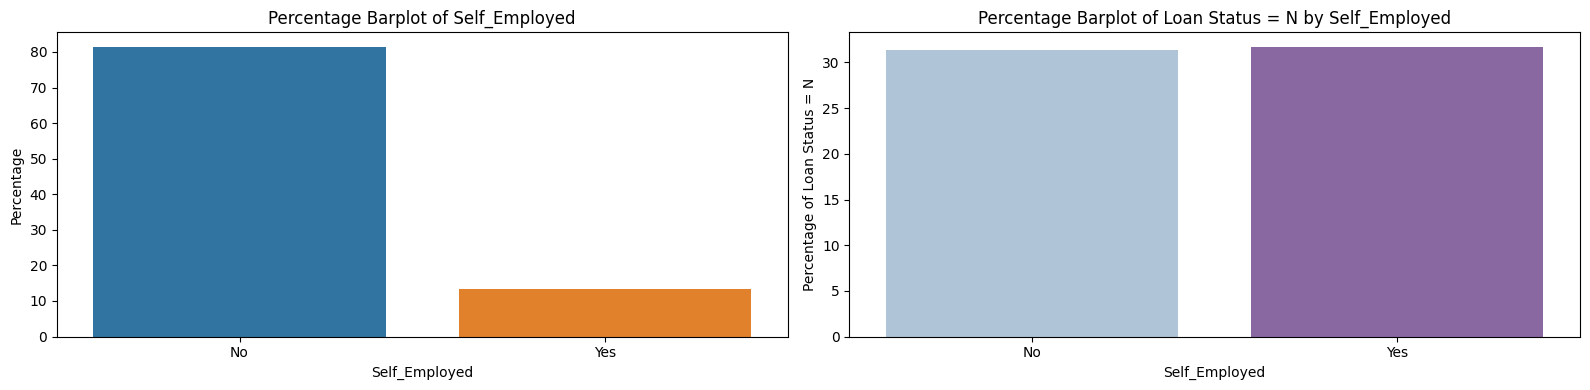

In [173]:
# Self Employed
categorical_plots(df, 'Self_Employed')

In [174]:
analyze_categorical_relationship(df, 'Self_Employed', 'Loan_Status')

Variable: Self_Employed
Chi-Square: 0.0
P-Value: 1.0
Relationship: Not Significant



**Insight**
- Mayoritas client bukan seorang 'Self_Employed'. Lebih dari 80% client yang bukan self_employed.
- Berdasarkan boxplot hubungan Self Employed dan Loan Status, kedua data ini tidak memilliki signifikansi. Presentase data client yang merupakan 'Self Employed' dan bukan relatif sama yaitu 30%. Pernyataan ini juga didukung oleh p value yang melebihi batas nilai signifikansi.

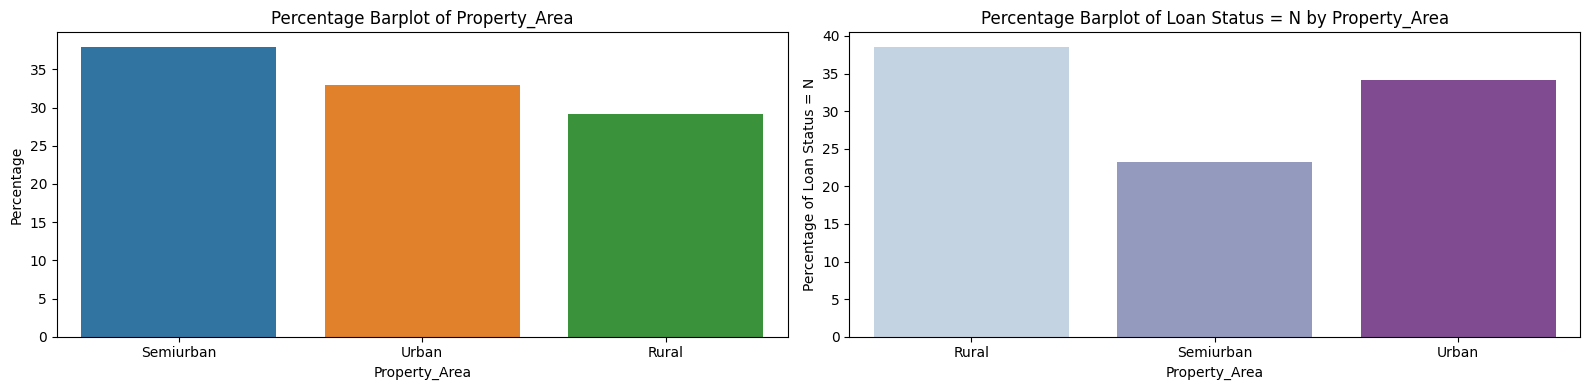

In [175]:
categorical_plots(df, 'Property_Area')

In [176]:
analyze_categorical_relationship(df, 'Property_Area', 'Loan_Status')

Variable: Property_Area
Chi-Square: 12.297623130485675
P-Value: 0.0021360187811644937
Relationship: Significant



**Insight:**
- Presentase data dari setiap label Properti Area tidaklah sama namun relatif mirip yang berkisar di presentase 30% hingga 35%.
- Boxplot antara loan status dan property area menunjukkan bahwa property area 'Rural' berpotensi lebih besar dalam gagal melakukan pinjaman, kemudian disusul property area 'Urban', dan  terakhir pada property area 'Semiurban'. Rasio Presentase antar ketiga property area yang gagal melakukan peminjaman terlihat lebih jelas daripada rasio presentasi dari seluruh data property area. Dengan kata lain dapat dikatakan client yang property areanya 'Semiurban' memiliki potensi yang lebih besar dalam melakukan peminjaman.

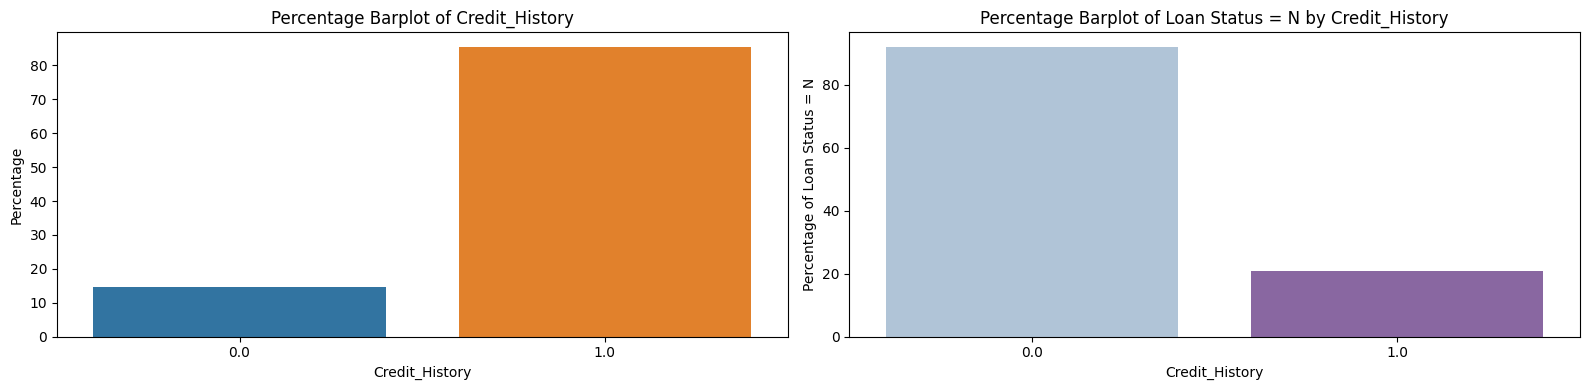

In [308]:
categorical_plots(df, 'Credit_History')

In [309]:
analyze_categorical_relationship(df, 'Credit_History', 'Loan_Status')

Variable: Credit_History
Chi-Square: 176.1145746235241
P-Value: 3.418349997909119e-40
Relationship: Significant



- Jumlah client yang memiliki credit history jauh lebih banyak dibanding client yang tidak memiliki credit history. Namun, uniknya klien yang gagal melakukan pembayaran ialah klien yang tidak memiliki credit history. Ini berarti perusahaan dapat mempercayai klien yang memiliki credit history.

----

### **Numerical Data**

In [178]:
#Descriptive Statistic
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Insight**
Berdasarkan pendekatan statistik dari nilai mean dan median, maka:
- Feature ApplicantIncome, Coapplicant, LoanAmount terdistribusi skewed positif atau terdistribusi pada nilai yang lebih besar dari Mean. Ketiga feature ini memiliki Mean > Median.
- Feature Loan Amount Term dan Credit History memiliki Median > Mean, sehingga data-datanya terdistribusi di bawah nilai rata"

Sekarang, mari buktikan distribusi data dengan visualisasi histogram.

**Histogram** digunakan untuk menentukan apakah variabel terdistribusi secara normal. Kita juga dapat menggunakan boxplot untuk memvisualisasikan outlier secara langsung. Boxplot adalah cara standar untuk menampilkan distribusi variabel menggunakan kuartil pertama, median, kuartil ketiga, dan kumis.

Melihat boxplot, Anda dapat dengan mudah mengidentifikasi:

- Median, ditunjukkan dengan garis di dalam kotak.
- Rentang antar-kuantil (IQR), kotak itu sendiri.
- Kuantil, 25 (Q1) adalah ujung bawah dan 75 (Q3) ujung atas kotak.
- Whisker, nilainya lebih besar dari kuartil 3 dan lebih kecil dari kuartil 1
- Nilai apa pun yang berada di luar Whisker dianggap sebagai outlier.

In [299]:
# Create function to create histogram and boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.axvline(df[variable].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[variable].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.title('Histogram')
    plt.legend()

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')


    plt.show()


In [ ]:
# Create boxplot
sns.boxplot(data=df, x='Married', y='Income')
plt.xlabel('Married')
plt.ylabel('Income')
plt.title('Income by Married Status')
plt.show()

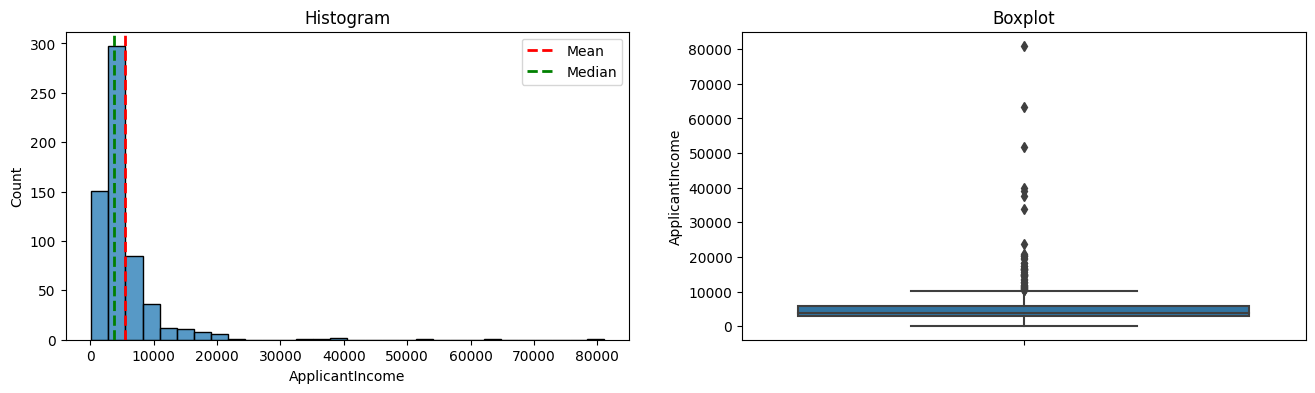


Skewness Value :  6.539513113994625

Mean Value :  5403.459283387622

Median Value :  3812.5


In [300]:
# Let's start with the variable ApplicantIncome from the Lion Loan dataset.
# Applicant Imcome merupakan perndapatan income seorang pemohon tiap bulannya.

diagnostic_plots(df, 'ApplicantIncome')
print('\nSkewness Value : ', df['ApplicantIncome'].skew())
print('\nMean Value : ', df['ApplicantIncome'].mean())
print('\nMedian Value : ', df['ApplicantIncome'].median())

**Insight:**
- Data Aplicant Income memiliki skewness value yang lebih dari 0.5 yang menunjukkan datanya terdistribusi skewed positif atau terkonsentarasi ke nilai yang lebih besar. 
- Mayoritas applicant memiliki income 3.000 hingga 8.500 Dollar per tahun
- Distribusi data yang skewed ini memicu adanya outlier. Pada boxplot terlihat banyak titik" data(outlier) yang berada di luar whisker. Data-data ini terkonsentrasi dari 11.000 hingga 80.000 dollars.

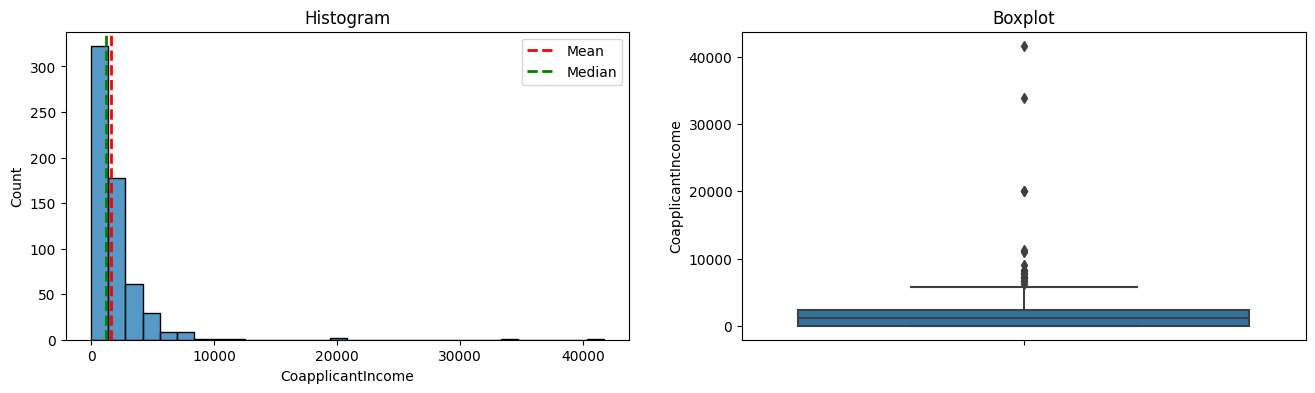


Skewness Value :  7.491531216657306

Mean Value :  1621.2457980271008

Median Value :  1188.5


In [301]:
# Let's start with the variable CopplicantIncome from the Lion Loan dataset.
# Co Applicant Imcome merupakan perndapatan income dari partner pemohon tiap tahunnya.

diagnostic_plots(df, 'CoapplicantIncome')
print('\nSkewness Value : ', df['CoapplicantIncome'].skew())
print('\nMean Value : ', df['CoapplicantIncome'].mean())
print('\nMedian Value : ', df['CoapplicantIncome'].median())

In [182]:
analyze_categorical_relationship(df, 'CoapplicantIncome', 'Loan_Status')

Variable: CoapplicantIncome
Chi-Square: 281.1238560166138
P-Value: 0.5702980314497069
Relationship: Not Significant



- Data CoapplicantIncome juga memiliki distribusi yang miring ke arah kanan, ke nilai yang lebih besar. Pada boxplot juga terlihat beberapa titik data outlier. Ada outlier yang nilainya sangat jauh dari nilai certain data.
- Pendapatan partner applicant berkisar antara 1500 hingga 3000 Dollar.
- Data oulier coapplicant berkisar 6.000 hingga 40.000 dollar.

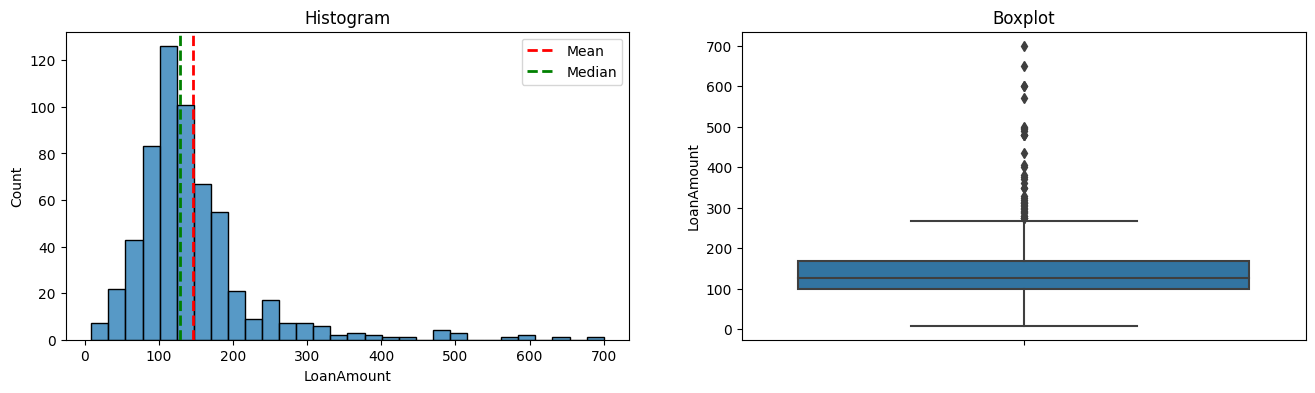


Skewness Value :  2.677551679256059

Mean Value :  146.41216216216216

Median Value :  128.0


In [183]:
# Let's start with the variable Loant Amount from the Lion Loan dataset.
# Loan Amount merupakan jumlah pinjaman yang diajukan pemohon

diagnostic_plots(df, 'LoanAmount')
print('\nSkewness Value : ', df['LoanAmount'].skew())
print('\nMean Value : ', df['LoanAmount'].mean())
print('\nMedian Value : ', df['LoanAmount'].median())

In [184]:
analyze_categorical_relationship(df, 'LoanAmount', 'Loan_Status')

Variable: LoanAmount
Chi-Square: 204.3266166458526
P-Value: 0.4409913980353973
Relationship: Not Significant



**Insight**
- LoanAmount juga memiliki distribusi skewed positif, dimana data cenderung terdistribusi ke nilai yang lebih besar.
- Missing values yang ada pada data Loan Amount juga terdistribusi pada nilai" yang lebih besar atau pada bagian ekor distribusi tersebut. Data yang hilang pada LoanAmount akan dihandle dengan nilai median dikarenakan distribusi yang skewed.
- Jumlah pinjaman yang diajuakan berkisar dari 100 hingga 180 dollars.
- Namun, beberapa applicant mengajukan pinjaman yang besar mulai dari 300 hingga 700 dollars. Data tersebut terdeteksi sebagai outlier.

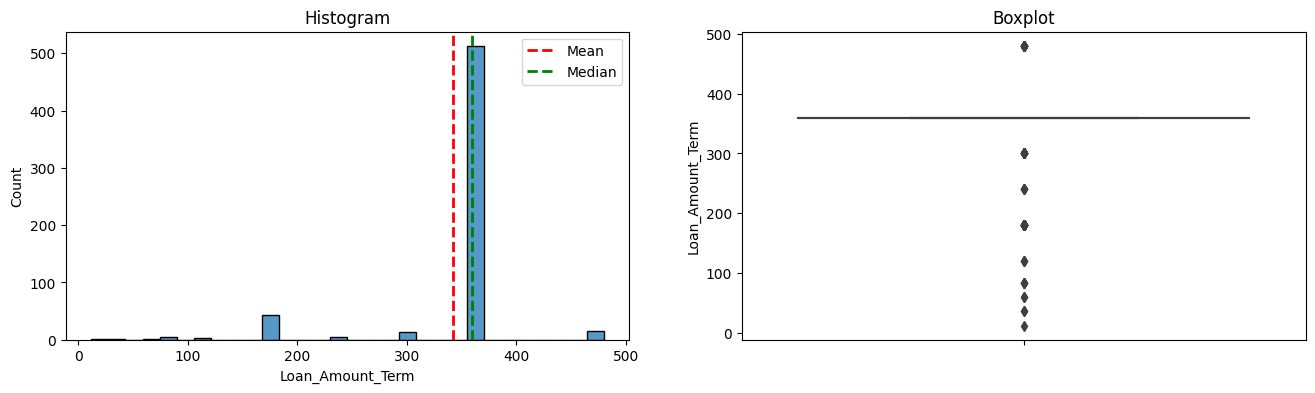


Skewness Value :  -2.362414124216269
Mean Value :  342.0
Median Value :  360.0


In [185]:
# Let's start with the variable Loant Amount Term from the Lion Loan dataset.
# Loant Amount Term merupakan jangka waktu pembayaran pinjaman

diagnostic_plots(df, 'Loan_Amount_Term')
print('\nSkewness Value : ', df['Loan_Amount_Term'].skew())
print('Mean Value : ', df['Loan_Amount_Term'].mean())
print('Median Value : ', df['Loan_Amount_Term'].median())

In [186]:
analyze_categorical_relationship(df, 'Loan_Amount_Term', 'Loan_Status')

Variable: Loan_Amount_Term
Chi-Square: 14.01316695518133
P-Value: 0.12185762421276593
Relationship: Not Significant



**Insight**
- Skewness Loan Amount Term lebih kecil dari -0.5 yang menunjukkan data skewed. Nilai negatif menunjukkan data terkonsentrasi pada nilai-nilai yang kecil yang lebih kecil dari nilai rata".
- Rata" aplicant membayar pinjaman dalam jangka waktu 36 bulan. Namun ada sebagian applicant yang membayar kurang dari 36 bulan atau lebih dari 36 bulan. Jangka waktu yang lebih dari rata" waktu pembayaran termasuk ke dalam data pencilan.

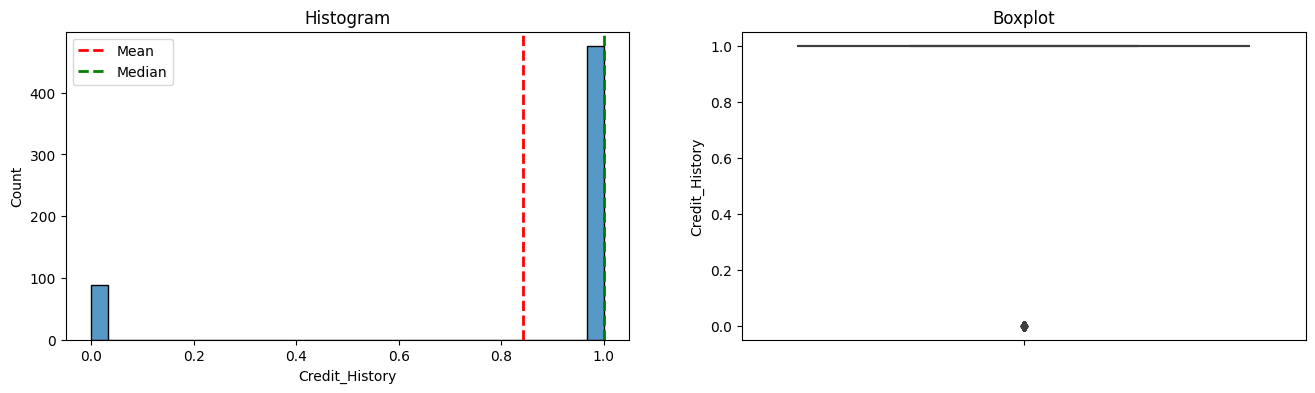


Skewness Value :  -1.8823610612186696
Mean Value :  0.8421985815602837
Median Value :  1.0


In [187]:
# Let's start with the variable Credit History from the Lion Loan dataset.
# Credit history merupakan informasi tentang riwayat kredit pemohon.

diagnostic_plots(df, 'Credit_History')
print('\nSkewness Value : ', df['Credit_History'].skew())
print('Mean Value : ', df['Credit_History'].mean())
print('Median Value : ', df['Credit_History'].median())

In [188]:
analyze_categorical_relationship(df, 'Credit_History', 'Loan_Status')

Variable: Credit_History
Chi-Square: 174.63729658142535
P-Value: 7.184759548750746e-40
Relationship: Significant



- Mayoritas klien yang berhasil dalam melakukan pinjaman memiliki 1 kali credit history.
- Data missing value muncul karena data yang skewed. Data missing values akan diimputasi dengan imputasi nilai median.

Kita telah mengetahui karakteristik data numerikal. Selanjutnya, bagaimana korelasi antara data numerikal? 

Kolerasi pearson digunakan untuk menjawab pertanyaan tersebut. Person merupakan metode untuk mengetahui korelasi antar data numerikal. Nilai korelasi berada pada rentang -1 hingga 1. Semakin dekat nilainya dengan 1 atau -1 maka semakin baik korelasinya, tanda positif menunjukkan hubungan yang berbanding lurus dan tanda negatif menunjukkan hubungan yang berbanding terbalik. Namun, semakin mendekati nilai 0 maka semakin kecil korelasi antar feature.

In [189]:
# Mengganti nilai dalam kolom "Loan_Status" menjadi 0 dan 1
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


Berdasarkan korelasi pearson, feature numerik yang memiliki korelasi yang baik dengan loan status hanya Credit_History. 

### Bagaimana hubungan antara Education dan Applicant Income?

In [190]:
# Menghitung rata-rata pendapatan berdasarkan tingkat pendidikan
education_income = df.groupby('Education')['ApplicantIncome'].mean()
print(education_income)

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64


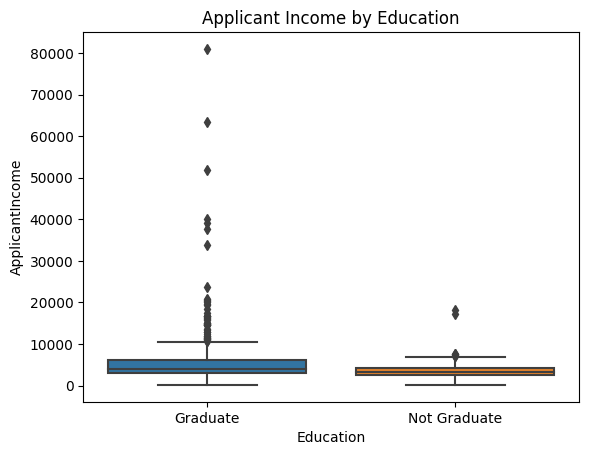

In [191]:
# Create Boxplot untuk membandingkan pendapatan berdasarkan tingkat pendidikan
sns.boxplot(data=df, x='Education', y='ApplicantIncome')
plt.xlabel('Education')
plt.ylabel('ApplicantIncome')
plt.title('Applicant Income by Education')
plt.show()

In [192]:
# Calculate correlation between Educatioon and Applicant Income
education_groups= df.groupby('Education')['ApplicantIncome'].apply(list)
t_statistic, p_value = stats.ttest_ind(*education_groups)
print('T-statistic:', t_statistic)
print('P-value:', p_value)

T-statistic: 3.5172355275601177
P-value: 0.00046836354511219775


- AVG Applicant Income yang Graduate (5857.433333) > Not Graduate (3777.283582).
-Maximum income seorang applicant yang graduate mencapai 80.000/year, sedangkan maximum income dari applicant yang Not Graduate hanya mencapai 20.000/year.
- Education dan applicant income memiliki hubungan yang significant.

### Bagaimana hubungan antara income dan married

In [223]:
# Create new features
df['Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [194]:
# Calculate the average income based on married status
married_income =df.groupby('Married')['Income'].mean()
print(married_income)

Married
No     6286.943662
Yes    7423.806332
Name: Income, dtype: float64


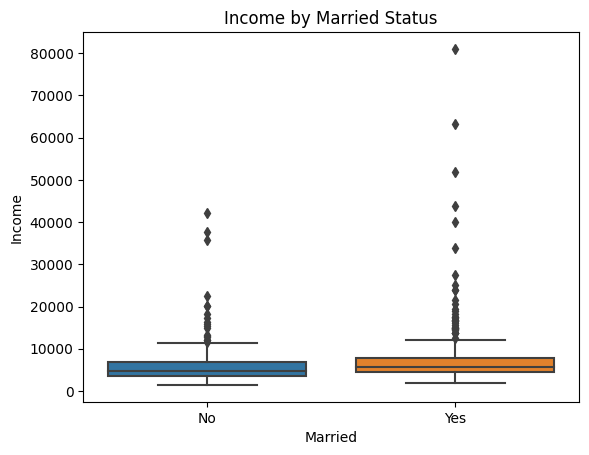

In [195]:
# Create boxplot
sns.boxplot(data=df, x='Married', y='Income')
plt.xlabel('Married')
plt.ylabel('Income')
plt.title('Income by Married Status')
plt.show()

In [196]:
# Calculate correlation between married and income
married_group = df[df['Married'] == 'Yes']['Income']
not_married_group = df[df['Married'] == 'No']['Income']
t_statistic, p_value = stats.ttest_ind(married_group, not_married_group)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 2.074704913962385
P-value: 0.03843330315634075


- Mean dan Maximum income dari client yang telah menikah lebih besar daripada Mean dan Maximum income client yang belum menikah.
- Data income dan status married memiliki hubungan yang signifikan. Hal ini dapat dilihat pada p-value yang berada dibawah batas significant.

C:\Users\HP\AppData\Local\Temp\ipykernel_12264\900290196.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), annot=True, linewidth=0.5,


Text(0.5, 1.0, 'Correlation matrix')

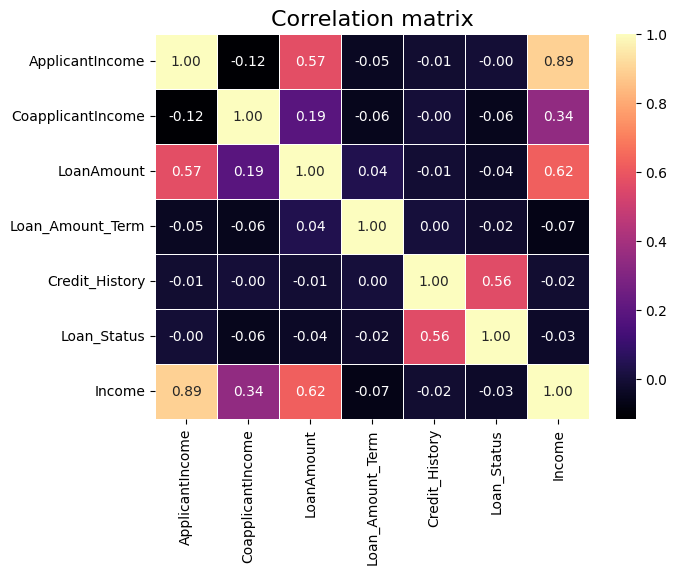

In [197]:
# Heatmap
fig, axs = plt.subplots(figsize = (7, 5))

sns.heatmap(df.corr(method='pearson'), annot=True, linewidth=0.5, 
            fmt=".2f", cmap='magma')
plt.title('Correlation matrix', fontsize=16)

### Feature Engineering

Tujuan utama dari feature engineering adalah untuk mengungkap informasi yang lebih relevan atau menggambarkan data dengan cara yang lebih baik sehingga model dapat mempelajari pola yang lebih baik dan membuat prediksi yang lebih akurat.

In [198]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
Income                0
dtype: int64

- Kita telah mengetahui bahwa data Gender dan Self Employed hilang secara acak (MCAR), data Dependents sebagian hilang secara acak(MAR) dan Married hilang secara tidak random(MNAR)
- Data yang hilang dengan mekanisme MCAR dan MAR bisa saja diabaikan karena tidak akan memberikan bias ketika modellin. Namun, jumlah data yang kita miliki terbatas. Menghapus data dapat menghilangkan informasi, sehingga data yang hilang akan diganti dengan data modus.
- Data 'Married' memiliki missing values yang paling sedikit, namun karena data hilang dengan mekanisme MNAR, maka data tidak akan dihapus karena dapat menyebabkan bias. Oleh karena itu data ini akan diimputasi dengan nilai modus.
- Data Loan Amount dan Credit History memiliki data yang skewed sehingga missing values akan ditangani dengan imputasi nilai median.

In [262]:
# Claculate modus from 'Gender', 'Married', 'Dependents', 'Self_Employed'
gender_mode = df['Gender'].mode()[0]
married_mode = df['Married'].mode()[0]
dependents_mode = df['Dependents'].mode()[0]
self_employed_mode = df['Self_Employed'].mode()[0]

# Replace the missing values with the mode in the column 'Gender', 'Married', 'Dependents', 'Self Employed'
df['Gender'] = df['Gender'].fillna(gender_mode)
df['Married'] = df['Married'].fillna(married_mode)
df['Dependents'] = df['Dependents'].fillna(dependents_mode)
df['Self_Employed'] = df['Self_Employed'].fillna(self_employed_mode)

#Claculate median from numerical columns
median_loan_amount = df['LoanAmount'].median()
median_loan_amount_term = df['Loan_Amount_Term'].median()
median_credit_history = df['Credit_History'].median()

# Replace the missing values with the mode
df['LoanAmount'] = df['LoanAmount'].fillna(median_loan_amount)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(median_loan_amount_term)
df['Credit_History'] = df['Credit_History'].fillna(median_credit_history)

In [263]:
# Recheck missing values
df.isnull().sum()

Loan_ID                        0
Gender                         0
Married                        0
Dependents                     0
Education                      0
Self_Employed                  0
ApplicantIncome                0
CoapplicantIncome              0
LoanAmount                     0
Loan_Amount_Term               0
Credit_History                 0
Property_Area                  0
Loan_Status                    0
Income                         0
ApplicantIncome_Category       0
CoapplicantIncome_Category     0
LoanAmount_Category           22
dtype: int64

Missing values telah ditangani. Selanjutnya adalah menangani outlier. Semua data numerikal terdistribusi skewed, sehinga memiliki data outliers.
- Data income (ApplicantIncome & CoapplicantIncome), data-data yang menjadi pencilan pada data income adalah income yang nilainya lebih besar. Setiap client memiliki income yang berbeda-beda, ada client yang memiliki income kecil hingga rata", ada juga yang memiliki income yang sangat besar (misalnya seorang pengusaha). Outlier pada data income adalah hal yang wajar, sehingga outliernya tidak akan di handling.
- Jumlah pinjaman yang diajukan client itu sangat beragam bergantung dari kebutuhannya. Data pencilan pada jumlah pinjaman terkontribusi pada jumlah pinjaman yang besar. Hal ini mungkin saja terjadi apabila kebutuhan applicant yang besar (misal ingin membuka usaha namun membutuhkan biaya besar).
- Rata" client membayar pinjaman selama 36 bulan, namun ada beberapa client yang memilih untuk membayar pinjaman dalam waktu kurang dari 36 bulan. Hal ini bisa saja terjadi jika client tidak ingin menanggung beban terlalu lama misalnya ataupun jumlah pinjamannya yang kecil sehingga mampu membayar lebih cepat.
-Credit History hanya terdiri dari 2 data yaitu data client memiliki histori kredit sebanyak sekali ataupun tidak memiliki histori kredit.  Data yang terdeteksi sebagai pencilan adalah data minoritas yaitu klient yang tidak memiliki data credit history. Data outlier pada credit history juga tidak akan dilakukan penanganan khusus.

Berdasarkan korelasi heatmap, data income dan data amount tidak memberikan impact terhadap status loan seorang client. Oleh karena itu, dibuat feature kategorikal baru berdasarkan income dan melihat apakah ada perubahan korelasi setelah feature engineering.

In [266]:
# Membuat kategori berdasarkan rentang nilai 'ApplicantIncome'
bins = [0, 1000, 5000, 15000, 20000, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High', 'Ultra High']

df['ApplicantIncome_Category'] = pd.cut(df['ApplicantIncome'], bins=bins, labels=labels, right=False)


In [303]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049,7024.705081
std,6109.041673,2926.248369,84.107233,64.428629,0.352339,6458.663872
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


In [267]:
# Membuat kategori berdasarkan rentang nilai 'CoapplicantIncome'
bins = [0, 1000, 5000, 15000, 20000, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High', 'Ultra High']


df['CoapplicantIncome_Category'] = pd.cut(df['CoapplicantIncome'], bins=bins, labels=labels, right=False)


In [305]:
# Membuat kategori berdasarkan rentang nilai '  Loant Amount'
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['Low', 'Moderate', 'High', 'Very High', 'Ultra High']


df['LoanAmount_Category'] = pd.cut(df['LoanAmount'], bins=bins, labels=labels, right=False)

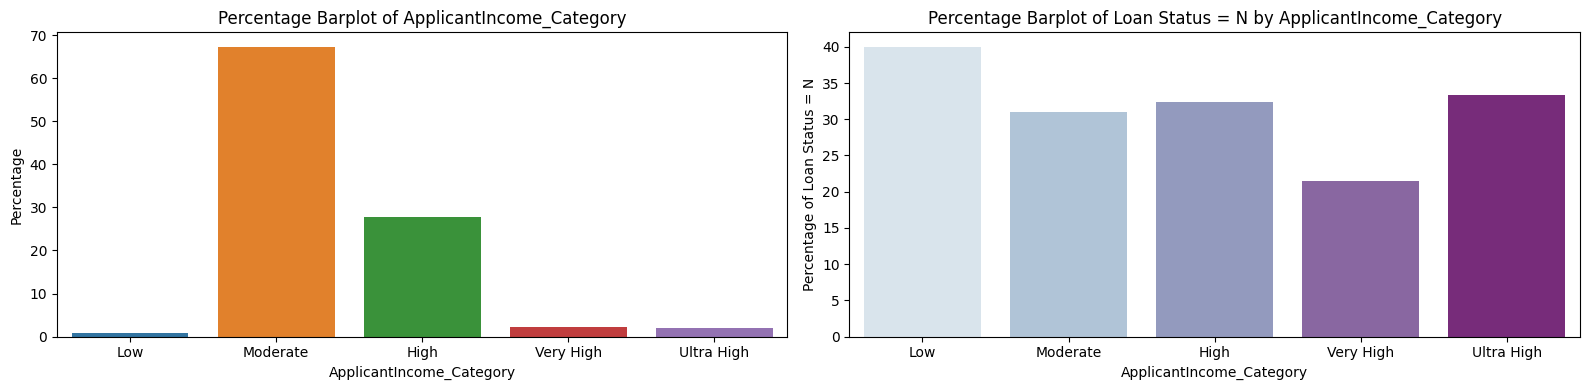

In [294]:
categorical_plots(df, 'ApplicantIncome_Category')

In [296]:
analyze_categorical_relationship(df, 'ApplicantIncome_Category', 'Loan_Status')

Variable: ApplicantIncome_Category
Chi-Square: 0.9395231039372666
P-Value: 0.9188233693197794
Relationship: Not Significant



Data applicant income tidak memiliki korelasi yang signifikan terhadap kegagalan pembayaran pinjaman.

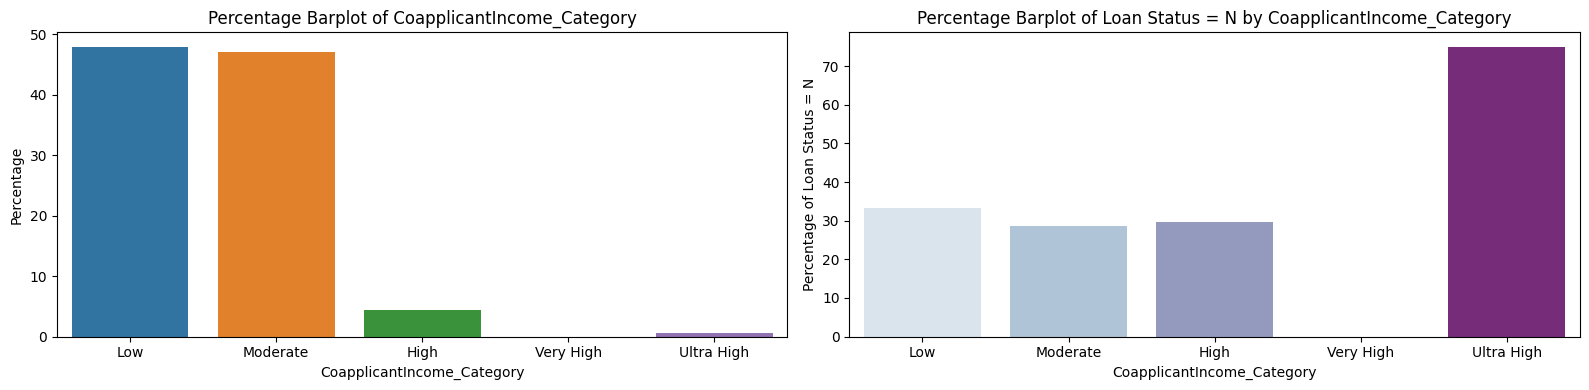

In [295]:
categorical_plots(df, 'CoapplicantIncome_Category')

In [297]:
analyze_categorical_relationship(df, 'CoapplicantIncome_Category', 'Loan_Status')

Variable: CoapplicantIncome_Category
Chi-Square: 5.049874687114
P-Value: 0.1681812924823578
Relationship: Not Significant



**Insight**:
Terdapat korelasi antara data coapplicant income dengan kegagalan pembayaran peminjaman, namun tidak signifikan. Persentase barplot menunjukkan bahwa klien yang partnerya memiliki income yang ultra high cenderung gagal melakukan pembayaran pinjaman. Mengapa itu bisa terjadi? Let's check the correlation using boxplot.

<Axes: xlabel='ApplicantIncome_Category', ylabel='LoanAmount'>

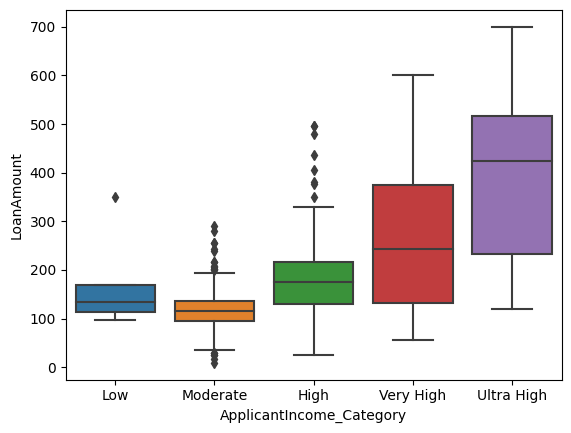

In [306]:
sns.boxplot(x='ApplicantIncome_Category', y='LoanAmount', data=df)

Alasan mengapa client yang partnernya memiliki income yang tinggi, namun gagal melakukan pembayaran pinjaman adalah karena jumlah pinjamannya juga besar.

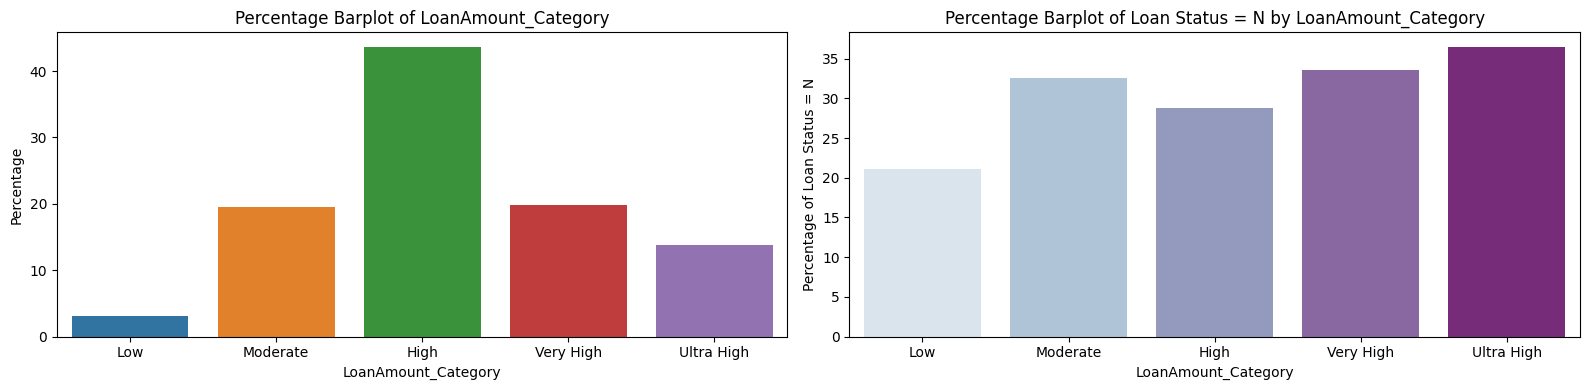

In [293]:
categorical_plots(df, 'LoanAmount_Category')

In [298]:
analyze_categorical_relationship(df, 'LoanAmount_Category', 'Loan_Status')

Variable: LoanAmount_Category
Chi-Square: 3.1905934980871122
P-Value: 0.5264515971859653
Relationship: Not Significant



Data loan amount tidak memberikan korelasi yang signifikan terhadap kegagalan pembayaran pinjaman.

### Data processing



In [270]:
# Splitting between 'X' and 'y'
X = df.drop(['Loan_Status'], axis = 1)
y = df['Loan_Status']

In [273]:
#Create Column Categorical and Numerical
num_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Income']
cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'ApplicantIncome_Category', 'CoapplicantIncome_Category', 'LoanAmount_Category']


print('Numerical columns: ', num_columns)
print('Categorical columns: ', cat_columns)

Numerical columns:  ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Income']
Categorical columns:  ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'ApplicantIncome_Category', 'CoapplicantIncome_Category', 'LoanAmount_Category']


In [274]:
# Split Train-set dan test-set based on column Types
#X
X_num = X[num_columns]

#X categorical
X_cat = X[cat_columns]

In [275]:
# Create numerical dataftame
X_num = X[num_columns]
# Robust Scaling
scaler = RobustScaler()
scaled_data_train = scaler.fit_transform(X_num)
# Convert scaled_data_train to dataframe
scaled_data_train_df = pd.DataFrame(scaled_data_train, columns=num_columns)


In [276]:
X_cat = X[cat_columns]
# Melakukan one-hot encoding
encoded_data_train = pd.get_dummies(X_cat, prefix=cat_columns)

In [278]:
# Concatenate the original dataframe, scaled dataframe, and encoded dataframe
final_df_train = pd.concat([scaled_data_train_df, encoded_data_train], axis=1)
final_df_train


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,CoapplicantIncome_Category_Low,CoapplicantIncome_Category_Moderate,CoapplicantIncome_Category_High,CoapplicantIncome_Category_Very High,CoapplicantIncome_Category_Ultra High,LoanAmount_Category_Low,LoanAmount_Category_Moderate,LoanAmount_Category_High,LoanAmount_Category_Very High,LoanAmount_Category_Ultra High
0,0.698029,-0.517358,0.000000,0.0,0.0,0.128883,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.264096,0.139079,0.000000,0.0,0.0,0.200998,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,-0.278492,-0.517358,-0.961240,0.0,0.0,-0.720107,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
3,-0.421422,0.509087,-0.124031,0.0,0.0,-0.141697,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.749786,-0.517358,0.201550,0.0,0.0,0.173881,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.312768,-0.517358,-0.883721,0.0,0.0,-0.749907,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
610,0.100600,-0.517358,-1.364341,-180.0,0.0,-0.390524,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
611,1.459983,-0.412885,1.937984,0.0,0.0,0.862847,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
612,1.292374,-0.517358,0.914729,0.0,0.0,0.645608,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


**Feature Selection**

In [279]:
ls_column = list(final_df_train)

In [280]:
# instansiasi objek untuk anova
anova_fs = SelectKBest(score_func=f_classif,k='all')

In [281]:
final_df_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Income,Gender_Female,Gender_Male,Married_No,Married_Yes,...,CoapplicantIncome_Category_Low,CoapplicantIncome_Category_Moderate,CoapplicantIncome_Category_High,CoapplicantIncome_Category_Very High,CoapplicantIncome_Category_Ultra High,LoanAmount_Category_Low,LoanAmount_Category_Moderate,LoanAmount_Category_High,LoanAmount_Category_Very High,LoanAmount_Category_Ultra High
0,0.698029,-0.517358,0.000000,0.0,0.0,0.128883,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.264096,0.139079,0.000000,0.0,0.0,0.200998,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
2,-0.278492,-0.517358,-0.961240,0.0,0.0,-0.720107,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
3,-0.421422,0.509087,-0.124031,0.0,0.0,-0.141697,0,1,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.749786,-0.517358,0.201550,0.0,0.0,0.173881,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.312768,-0.517358,-0.883721,0.0,0.0,-0.749907,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
610,0.100600,-0.517358,-1.364341,-180.0,0.0,-0.390524,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
611,1.459983,-0.412885,1.937984,0.0,0.0,0.862847,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
612,1.292374,-0.517358,0.914729,0.0,0.0,0.645608,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0


In [283]:
# fitting ke data
anova_fs = anova_fs.fit(final_df_train, y)

df_anova_fs = pd.Series(data=anova_fs.scores_, index=ls_column).sort_values(ascending=False)

c:\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [29] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Text(0.5, 1.0, 'F-Score setiap atribut numerik terhadap Target')

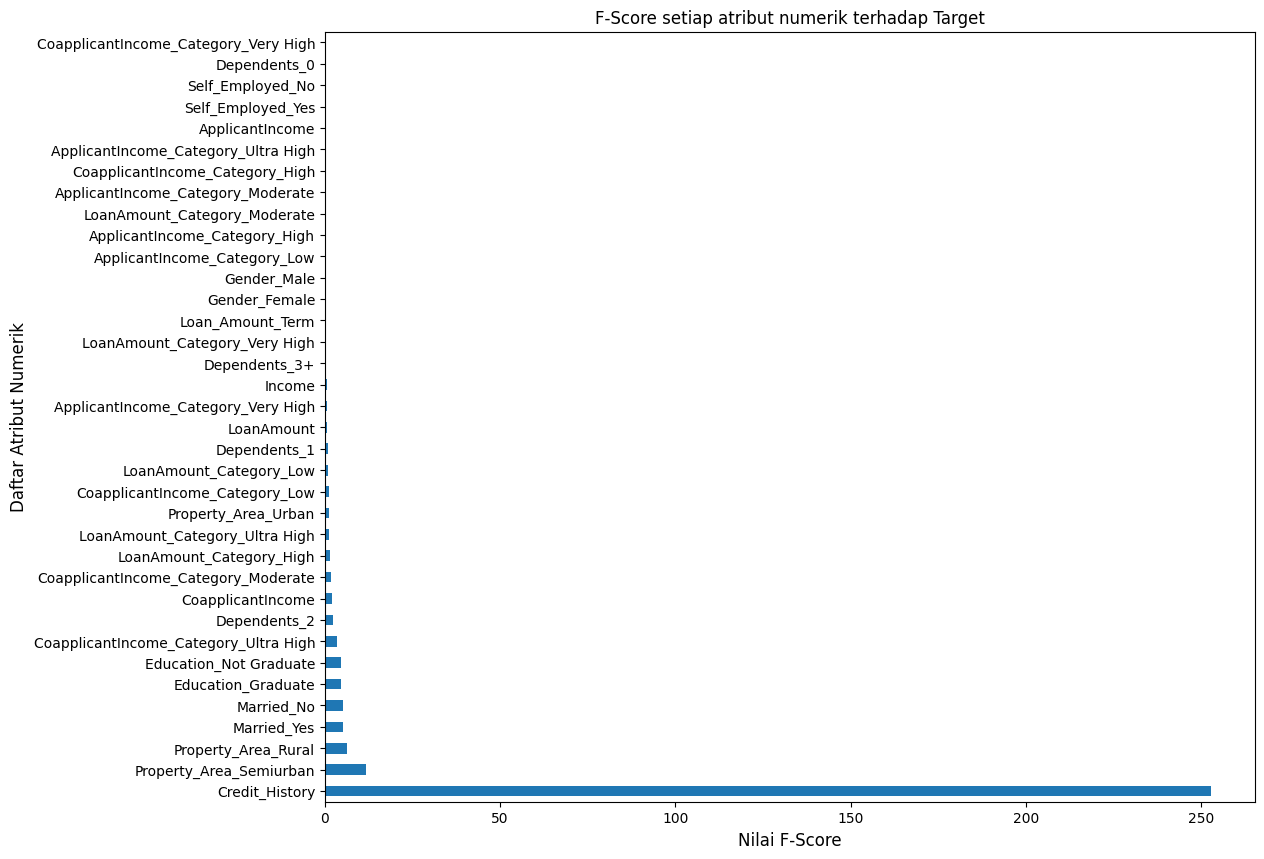

In [284]:
# Plotting score setiap atribut
plt.figure(figsize=(12,10))
df_anova_fs.plot(kind='barh')
plt.ylabel('Daftar Atribut Numerik', fontsize=12)
plt.xlabel('Nilai F-Score', fontsize=12)
plt.title('F-Score setiap atribut numerik terhadap Target',fontsize=12)

**Insight:**
Setelah melakukan feature engineering dan melakukan normalisasi data, terlihat jelas bahwa banyak data tidak memberikan pengaruh terhadap Loan status suatu client. Feature credit history menjadi satu-satu nya feature yang memberi pengaruh terhadap Loan status client. Selain Feature credit history, feature yang membericant impact terhadap loan status adalah:
- Property Area Semi Urban dan Rural
- Data Married
-Data Education
- Coapplicant Income untuk category ultrahigh.

Kita telah melakukan cleaning data, normalisasi data, feature engineering dan mengetahui feature apa saja yang memiliki korelasi yang sifnificant dengan loan status, sehingga data ini siap digunakan untuk modeling.

---

### Kesimpulan :


Kriteria klient yang cenderung gagal melakukan pembayaran pinjaman.
- Married, client yang gagal melakukan pembayaran didominasi oleh client yang belum menikah. Mayoritas data client yang telah menikah jauh lebih besar. Namun presentasi data client yang belum menikah dan gagal melakukan pinjaman lebih dasar dari data client yang menikah dan gagal melakukan peminjaman. Client yang telah menikah biasanya memiliki total income yang lebih tinggi.
- Education, data didominasi oleh client yang graduated. Namun, presentasi client yang gagal melakukan pembayaran juga lebih besar. Client yang telah Graduated memiliki income yang lebih tinggi dibanding client yang Not Graduated.
- Data income tidak memberi pengaruh besar terhadap kegagalan pembayaran pinjaman. Namun client yang coapplicantnya memiliki income yang sangat tinggi yaitu lebih dari 20.000 dollars per tahun cenderung gagal melakukan pembayaran pinjaman. Hal ini dikarenakan jumlah pinjamannya yang besar juga
- Property Area, client yang tinggal di area ‘Rural’ dan ‘Urban’ cenderung gagal melakukan pembayaran pinjaman.
- Credit History, client yang tidak memiliki credit history cenderung gagal melakukan pembayaran.